# load the data

In [1]:
import csv
import pandas as pd
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img

Using TensorFlow backend.


In [2]:
# The German Traffic Sign Recognition Benchmark
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
# grayscale type image can not be shown by plt.imshow function
# image array: for int: [0..255], for float: [0..1]
def readTrafficSigns(rootpath, img_size=(28,28), grayscale=True):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, target_size=img_size, color_mode='grayscale')
            else:
                img = load_img(img, target_size=img_size, color_mode='rgb')

            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
            img = exposure.equalize_hist(img)
            
            images.append(img)
            labels.append(int(row[7])) # the 8th column is the label
        gtFile.close()
    return np.array(images), labels

In [3]:
def readTrafficSigns_test(rootpath, img_size=(28,28), grayscale=True):
    images = [] # images
    labels = [] # corresponding labels
    
    gtFile = open(rootpath+"/GT-final_test.csv") # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        img = rootpath + '/' + row[0]
        if grayscale == True:
            img = load_img(img, target_size=img_size, color_mode='grayscale')
        else:
            img = load_img(img, target_size=img_size, color_mode='rgb')

        img = img_to_array(img)
        img = img/255
        img = img.clip(0, 1)
        img = exposure.equalize_hist(img)

        images.append(img)
        labels.append(int(row[7])) # the 8th column is the label
    gtFile.close()
    return np.array(images), labels

In [4]:
signnames_file = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/signnames.csv'
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}

In [5]:
sign_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [6]:
train_path = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/Final_Training/Images'
test_path = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/Final_Test/Images'

img_size = (32,32)
gray=True
X_train, y_train = readTrafficSigns(train_path, img_size=img_size, grayscale=gray)
X_test, y_test = readTrafficSigns_test(test_path, img_size=img_size, grayscale=gray)

c:\users\elementqi\appdata\local\programs\python\python37\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [7]:
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
# print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Class number =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Class number = 43


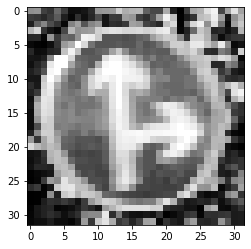

In [8]:
plt.imshow(array_to_img(X_train[35456]), cmap='gray')
plt.show()

# Include an exploratory visualization of the dataset

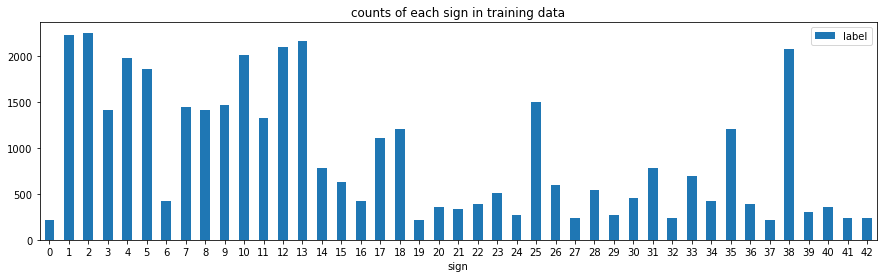

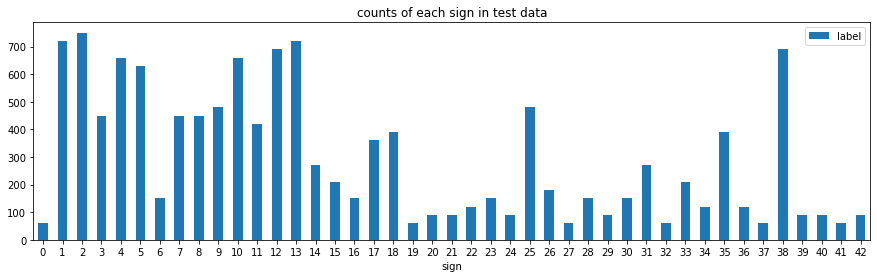

In [9]:
### Data exploration visualization code goes here.

# Plot Training / Test summary counts
for (data, name) in [[y_train, "training"], [y_test, "test"]]:
    df = pd.DataFrame({'label': data})
    counts = df.groupby(['label']).agg({'label': 'count'})
    counts.plot(kind='bar', title="counts of each sign in %s data" % name, figsize=(15,4), rot=0)
    plt.xlabel("sign")
    plt.show()

In [10]:
    
# # Gather 5 Example images per label
# examples_per_sign = 5
# total = 0
# example = {}
# for (img,label) in zip(X_train, y_train):
#     example.setdefault(label, [])
#     if len(example[label]) < examples_per_sign:
#         example[label].append(img)
#         total += 1
#     if total == n_classes * examples_per_sign:
#         break;

# for label in sorted(example.keys()):
#     fig = plt.figure()
#     print(sign_names[label])
#     for i in range(examples_per_sign):
#         plt.subplot(1,examples_per_sign,i+1)
#         plt.imshow(example[label][i])
#     plt.show()

# Model

In [11]:
from keras.models import Sequential
# from keras.optimizers import adadelta_v2
from tensorflow.keras.optimizers import Adadelta
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, CSVLogger

In [12]:
def ImLeNet(X_train,Y_train):
    model=Sequential()
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),input_shape=(32,32,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten(data_format='channels_last'))
    
    model.add(Dense(500))
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    #打印参数
    model.summary()
    #编译模型
    model.compile(optimizer=Adadelta(learning_rate=1),loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [13]:
filepath="weights.best.hdf5"
checkpoint= ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose=1, save_best_only=True)
csv_logger = CSVLogger('training.log')

callbacks_list= [checkpoint, csv_logger]

In [14]:
if __name__=="__main__":
    y_train = to_categorical(y_train, n_classes)
    y_test = to_categorical(y_test, n_classes)
    
    model=ImLeNet(X_train,y_train)
    model.fit(x=X_train,y=y_train, batch_size=20,epochs=20,verbose=1,validation_data=(X_test,y_test),callbacks=callbacks_list)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 60)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 60)        240       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 60)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 60)        240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)       

c:\users\elementqi\appdata\local\programs\python\python37\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


39209/39209 [==============================] - 15s 381us/step - loss: 0.1960 - accuracy: 0.9399 - val_loss: 0.1926 - val_accuracy: 0.9473

Epoch 00002: val_accuracy improved from 0.89264 to 0.94727, saving model to weights.best.hdf5
Epoch 3/20
39209/39209 [==============================] - 15s 389us/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.2754 - val_accuracy: 0.9270

Epoch 00003: val_accuracy did not improve from 0.94727
Epoch 4/20
39209/39209 [==============================] - 15s 389us/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1920 - val_accuracy: 0.9478

Epoch 00004: val_accuracy improved from 0.94727 to 0.94782, saving model to weights.best.hdf5
Epoch 5/20
39209/39209 [==============================] - 49s 1ms/step - loss: 0.0841 - accuracy: 0.9753 - val_loss: 0.2088 - val_accuracy: 0.9480

Epoch 00005: val_accuracy improved from 0.94782 to 0.94798, saving model to weights.best.hdf5
Epoch 6/20
39209/39209 [==============================] - 143s 4ms/step - lo

In [15]:
model.evaluate(x=X_test,y=y_test)

12630/12630 [==============================] - 11s 876us/step


[0.1414543148213731, 0.9714964628219604]

In [16]:
loss,acc=model.evaluate(x=X_test,y=y_test)
print("loss:{}===acc:{}".format(loss,acc))

12630/12630 [==============================] - 10s 769us/step
loss:0.1414543148213731===acc:0.9714964628219604


In [17]:
csv_logger.params

{'batch_size': 20,
 'epochs': 20,
 'steps': None,
 'samples': 39209,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}